<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r1_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-15-m-1-r1.csv?token=AKVFSOETZRFQBGVQK66MAC263H7KC')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-normal-n-0-15-r1.csv?token=AKVFSOA3XVJD43T2VKTXW2C63H7LS')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [80]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,78,1,78,78,0,8,3,27,0
1,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,19,1,19,19,8,4,3,27,1
2,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,77,2,78,154,8,4,3,27,0
3,88,0,1,4,1,1,5,17,23,7,1,1,2,3,3,1.000000,16,76,3,78,228,0,8,20,340,0
4,89,0,1,4,2,2,5,17,23,7,1,1,2,3,3,1.000000,17,75,4,78,300,0,32,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161590,3276525,4,2,6,2,2,3,9,18,2,20,4,30091,3,1,0.333333,15,5,16,20,80,8,722184,18,162,0
161591,3276532,4,2,6,3,2,3,9,18,2,20,4,30091,3,1,0.333333,22,4,17,20,68,8,1083276,18,162,0
161592,3276539,4,2,6,4,2,3,9,18,2,20,4,30091,3,1,0.333333,29,3,18,20,54,8,1444368,18,162,0
161593,3276546,4,2,6,5,3,3,9,18,2,20,4,30091,3,1,0.333333,36,2,19,20,38,8,2708190,18,162,0


In [81]:
df.shape

(161595, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-15-m-11-r1.csv?token=AKVFSOH2WAU53NLLXJKHJZK63H7KM')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-15-m-12-r1.csv?token=AKVFSOC5UXUUHGMH6WRX2DS63IADW')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-15-m-7-r1.csv?token=AKVFSOCEMAZYITSUEMAWNZC63IAD4')

In [83]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(57667, 26)
(58499, 26)
(57667, 26)


Processing

In [84]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [86]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.092532,0.240906,-0.007207,0.010960,-0.538976,-0.468072,-0.063743,0.088004,-0.500815,-0.647002,0.053636,-0.085839,-0.033354,-0.090061,-0.059846,0.446787,0.041647,-0.098277,-0.368994,0.170958
inport,-0.092532,1.000000,-0.058424,0.008267,-0.012573,-0.212901,-0.344010,-0.073767,0.284479,0.071368,0.155448,0.160315,-0.128973,-0.144385,-0.206546,-0.153832,0.726341,-0.044149,-0.180403,-0.299299,0.349526
cache_coherence_type,0.240906,-0.058424,1.000000,0.286043,-0.434992,-0.185334,-0.238341,-0.006969,-0.008160,-0.057714,-0.085743,-0.378708,-0.003642,-0.031143,-0.026283,-0.015978,0.087807,0.275600,0.811694,0.322616,0.048185
flit_id,-0.007207,0.008267,0.286043,1.000000,-0.010229,0.121085,0.070707,0.017003,0.020545,0.019627,0.001368,0.468487,-0.003912,0.019265,0.011600,0.010696,0.002961,0.663502,0.335660,0.246020,-0.020561
flit_type,0.010960,-0.012573,-0.434992,-0.010229,1.000000,-0.184137,-0.107526,-0.025856,-0.031244,-0.029847,-0.002080,0.527475,-0.056984,0.034369,-0.017088,-0.013900,-0.004502,0.121542,-0.510445,-0.374128,0.031268
vnet,-0.538976,-0.212901,-0.185334,0.121085,-0.184137,1.000000,0.955227,0.077890,-0.042689,0.541517,0.640518,-0.144611,0.103871,0.118261,0.167840,0.122369,-0.370313,0.005017,0.423530,0.859007,-0.277307
vc,-0.468072,-0.344010,-0.238341,0.070707,-0.107526,0.955227,1.000000,0.079743,-0.113998,0.428091,0.522961,-0.144599,0.111978,0.138112,0.188965,0.138659,-0.464247,-0.019345,0.348053,0.830505,-0.309589
traversal_id,-0.063743,-0.073767,-0.006969,0.017003,-0.025856,0.077890,0.079743,1.000000,0.021944,-0.000375,-0.008066,-0.020739,0.200049,0.201043,0.303060,0.237944,-0.082634,0.548951,0.039872,0.070763,-0.279048
hop_count,0.088004,0.284479,-0.008160,0.020545,-0.031244,-0.042689,-0.113998,0.021944,1.000000,0.379554,0.021887,0.230720,-0.076772,-0.053800,-0.098658,-0.079873,0.427078,0.017205,-0.032896,-0.083201,0.127296
current_hop,-0.500815,0.071368,-0.057714,0.019627,-0.029847,0.541517,0.428091,-0.000375,0.379554,1.000000,0.842015,0.204472,0.016409,0.000760,0.012973,0.003720,-0.049617,-0.026984,0.268663,0.443341,-0.028814


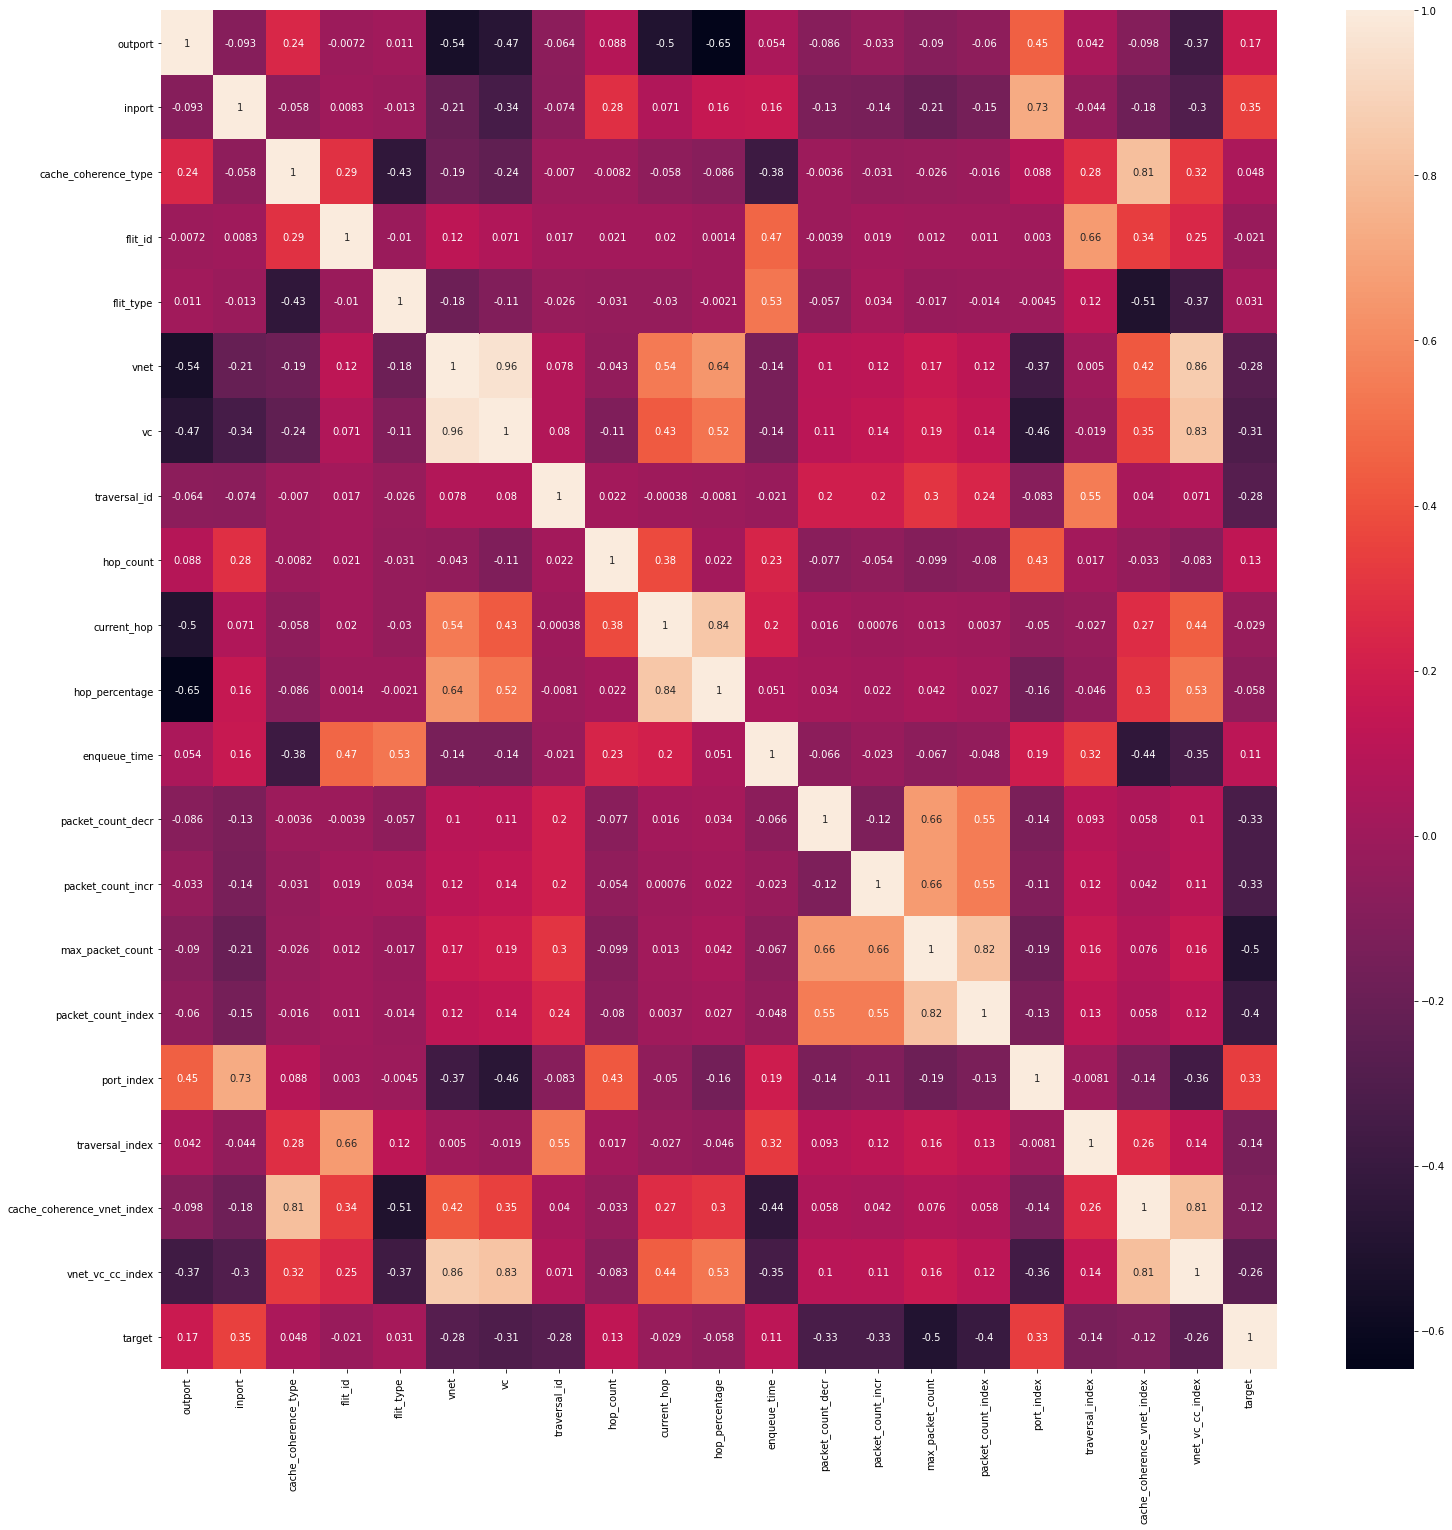

In [87]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [89]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

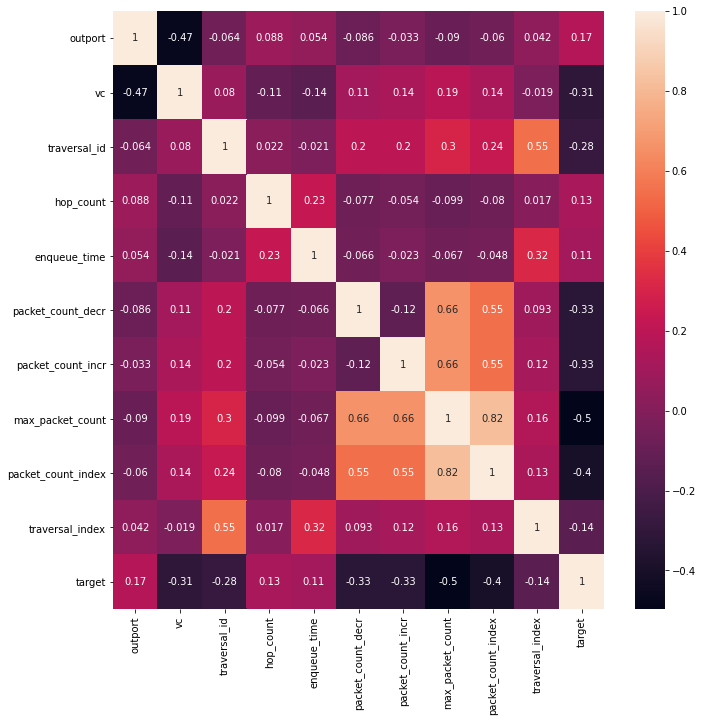

In [91]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

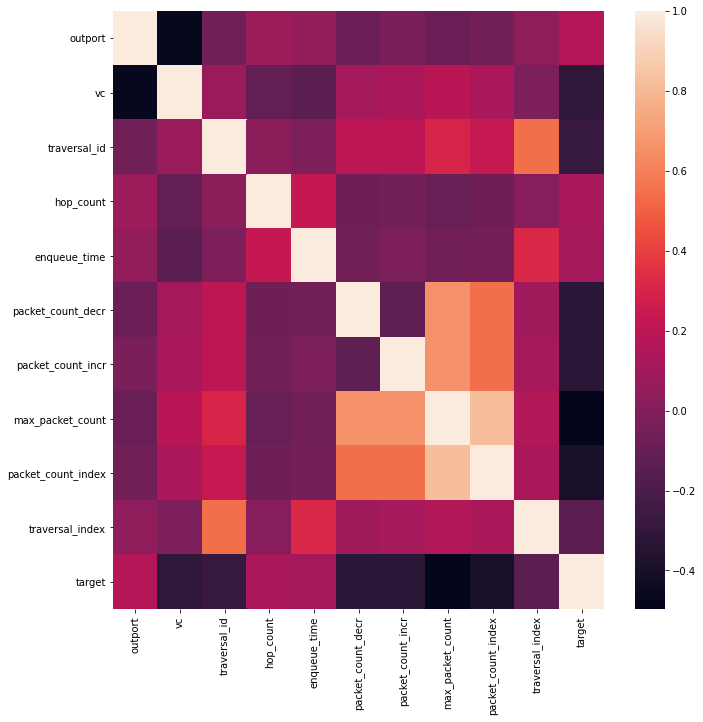

In [92]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [94]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.5,0.000,0.000033,0.500000,0.000000,0.466667,0.000000,0.466667,0.011046,0.000001
1,0.5,0.000,0.000000,0.666667,0.062500,0.109091,0.000000,0.109091,0.002582,0.000000
2,0.5,0.000,0.000000,0.666667,0.062500,0.460606,0.006061,0.466667,0.021948,0.000000
3,0.0,1.000,0.000033,0.500000,0.187500,0.454545,0.012121,0.466667,0.032563,0.000001
4,0.0,1.000,0.000033,0.500000,0.203125,0.448485,0.018182,0.466667,0.042892,0.000010
...,...,...,...,...,...,...,...,...,...,...
161590,1.0,0.000,0.999967,0.500000,0.171875,0.024242,0.090909,0.115152,0.011333,0.266666
161591,1.0,0.000,0.999967,0.500000,0.281250,0.018182,0.096970,0.115152,0.009611,0.399999
161592,1.0,0.000,0.999967,0.500000,0.390625,0.012121,0.103030,0.115152,0.007603,0.533333
161593,1.0,0.000,0.999967,0.500000,0.500000,0.006061,0.109091,0.115152,0.005308,1.000000


In [95]:
train_X[train_X.duplicated()].shape

(0, 10)

In [96]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000000,0.6,0.062500,0.230769,0.000000,0.230769,0.008547,0.000000
1,0.50,0.000000,0.000266,0.4,0.062500,0.221154,0.009615,0.230769,0.016738,0.000012
2,0.50,0.000000,0.000366,0.6,0.062500,0.211538,0.019231,0.230769,0.024217,0.000016
3,0.25,0.000000,0.000465,0.2,0.062500,0.201923,0.028846,0.230769,0.030983,0.000021
4,0.00,0.000000,0.000498,0.6,0.250000,0.192308,0.038462,0.230769,0.037037,0.000022
...,...,...,...,...,...,...,...,...,...,...
57662,1.00,0.000000,0.999967,0.4,0.171875,0.038462,0.009615,0.048077,0.003205,0.266666
57663,1.00,0.000000,0.999967,0.4,0.281250,0.028846,0.019231,0.048077,0.003917,0.399999
57664,1.00,0.000000,0.999967,0.4,0.390625,0.019231,0.028846,0.048077,0.003917,0.533333
57665,1.00,0.000000,0.999967,0.4,0.500000,0.009615,0.038462,0.048077,0.003205,1.000000


In [97]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [98]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [100]:
train_Y = df['target']
train_Y.value_counts()

0    116064
1     45531
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
1                  vc  5893.562702
7    max_packet_count  3716.503500
8  packet_count_index  3135.707612
6   packet_count_incr  1858.366192
5   packet_count_decr  1858.138110
2        traversal_id  1404.714949
0             outport  1044.163626
9     traversal_index   411.540344
3           hop_count   172.817424
4        enqueue_time   137.359485


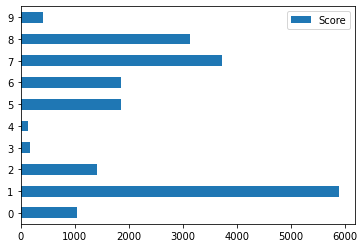

In [103]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [105]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [108]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.0086452137289
Test Prediction Score 96.29080953363211


In [109]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 82.3191773457957
Test Prediction Score 79.45434964700252
Test Prediction Score 81.80415142109005


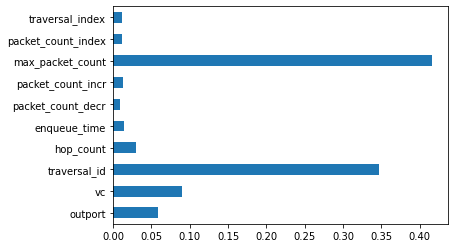

In [110]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

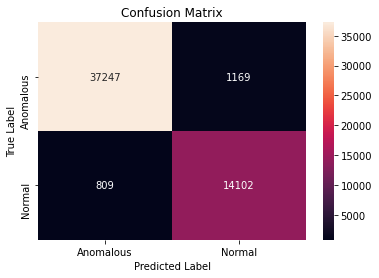

In [111]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [112]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     38416
           1       0.92      0.95      0.93     14911

    accuracy                           0.96     53327
   macro avg       0.95      0.96      0.95     53327
weighted avg       0.96      0.96      0.96     53327



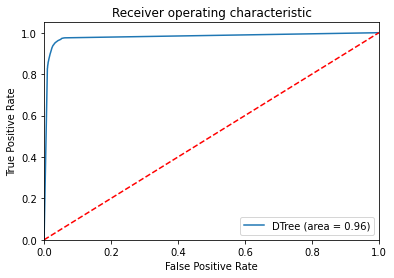

In [113]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [115]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r1l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [118]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.64745813565361


In [119]:
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
results = cross_val_score(xgbc, X_test, y_test, cv=kfold)
print (results*100)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[97.88111757 98.23738984 97.95612226 98.23738984 97.82486405 97.69360585
 98.3311457  97.56189047 97.86196549 98.27456864]
Accuracy: 97.99% (0.25%)


In [120]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 85.041704961243
Test Prediction Score 82.86124549137593
Test Prediction Score 85.03650267917526


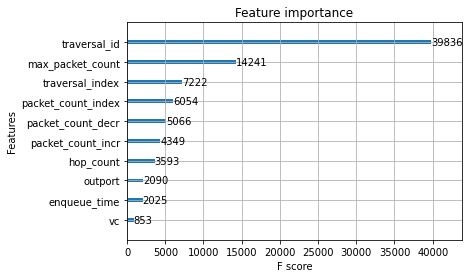

In [121]:
plot_importance(xgbc)
plt.show()

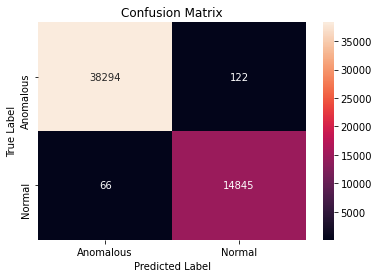

In [122]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [123]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38416
           1       0.99      1.00      0.99     14911

    accuracy                           1.00     53327
   macro avg       1.00      1.00      1.00     53327
weighted avg       1.00      1.00      1.00     53327



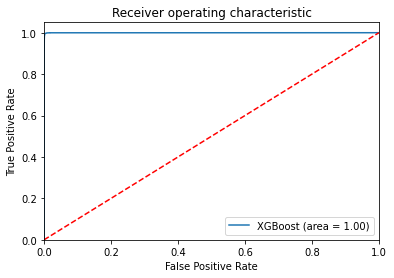

In [124]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()